In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

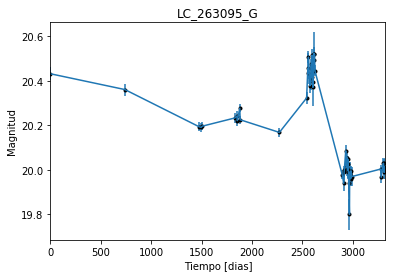

In [2]:
data = np.genfromtxt('LC_263095_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_263095_G')
plt.savefig("LC_263095_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

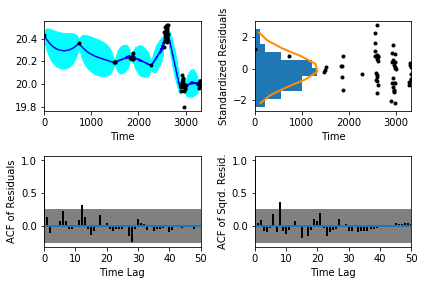

In [5]:
sample.assess_fit()

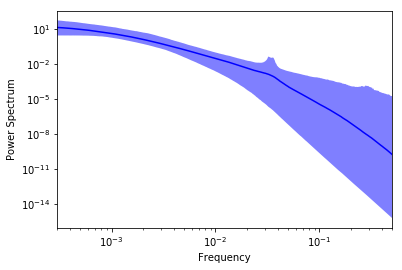

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

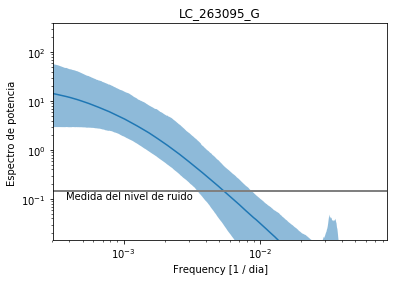

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_263095_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_263095_G')

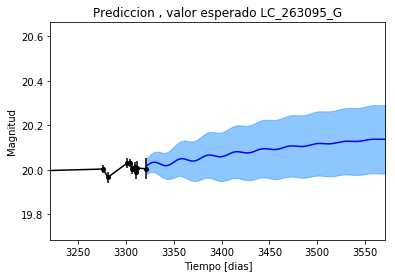

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_263095_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_263095_G')

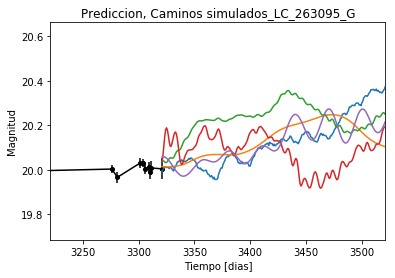

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_263095_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


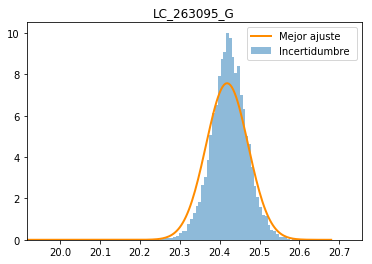

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_263095_G')
plt.savefig("Mejor_ajuste_LC_263095_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_263095_G')

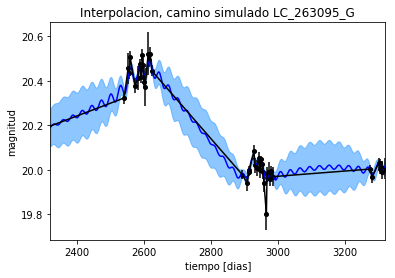

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_G')

Text(0.5,1,'Interpolacion, camino simulado LC_263095_G')

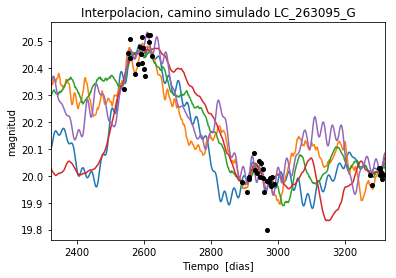

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 673.368408658
Median: 0.0179607765643
Standard deviation: 0.196206221312
68% credibility interval: [ 0.00117633  0.211597  ]
95% credibility interval: [  3.77242706e-04   7.59032046e-01]
99% credibility interval: [  3.17301851e-04   9.56931582e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 377.780237821
Median: 0.00479389874967
Standard deviation: 0.098048979273
68% credibility interval: [ 0.00064022  0.04888625]
95% credibility interval: [ 0.00034029  0.33139868]
99% credibility interval: [  3.09425648e-04   7.28242188e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 380.292448244
Median: 0.0317659170141
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 435.06901831
Median: 105.857995225
Standard deviation: 1.97132986776
68% credibility interval: [ 103.82973741  107.40283617]
95% credibility interval: [ 101.28894294  109.52925767]
99% credibility interval: [  99.4798141   110.36896018]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 404.058424761
Median: 0.728834335876
Standard deviation: 2.24167383575
68% credibility interval: [ 0.07744219  3.98966537]
95% credibility interval: [ 0.02331     7.61463824]
99% credibility interval: [  0.01360044  10.45896963]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1220.79564456
Median: 1.15910056487
Standard deviation: 9.93653219696
68% credibility interval: [  0.05122541  11.98711447]
95% credibility interval: [  9.34733652

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0311164
Median: 3.70863541417e-56
Standard deviation: 3.14403288527e+13
68% credibility interval: [  7.41803837e-126   4.53395971e-020]
95% credibility interval: [  9.83869407e-151   3.12228887e-001]
99% credibility interval: [  2.49762609e-164   9.50349856e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2185.84036234
Median: 20.2279445633
Standard deviation: 0.0874430808324
68% credibility interval: [ 20.15082943  20.30835295]
95% credibility interval: [ 20.05833843  20.40802611]
99% credibility interval: [ 19.97847484  20.48949626]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 831.027500375
Median: 0.0367384944823
Standard deviation: 0.261421760933
68% credibility interval: [ 0.         0.4548259]
95% credibility interval: [ 0.          0.91016443]
99% credibility interval: [ 0.          0.98839421]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 831.027500375
Median: 0.0367384944823
Standard deviation: 0.261421760933
68% credibility interval: [ 0.         0.4548259]
95% credibility interval: [ 0.          0.91016443]
99% credibility interval: [ 0.          0.98839421]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1538.91851925
Median: 0.0
Standard deviation: 0.000478487838557
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 435.06901831
Median: 105.857995225
Standard deviation: 1.97132986776
68% credibility interval: [ 103.82973741  107.40283617]
95% credibility interval: [ 101.28894294  109.52925767]
99% credibility interval: [  99.4798141   110.36896018]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1486.00903705
Median: 0.0332395500378
Standard deviation: 0.0294225717763
68% credibility interval: [ 0.02118722  0.05615337]
95% credibility interval: [ 0.0140531   0.10473344]
99% credibility interval: [ 0.01130684  0.17652744]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 931.891198239
Median: 1.18966237462
Standard deviation: 0.222907524637
68% credibility interval: [ 0.98901704  1.43165208]
95% credibility interval: [ 0.82342551  1.6986664 ]
99% credibility interval: [ 0.73656028  1.88761268]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 470.140564164
Median: 0.00123635452242
Standard deviation: 0.202624606864
68% credibility interval: [  3.15668688e-05   3.31536263e-02]
95% credibility interval: [  2.00936274e-06   6.15765848e-01]
99% credibility interval: [  2.41709045e-07   1.24046625e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 673.368408658
Median: (-0.112850887414-1.78036509022j)
Standard deviation: 2.05372924236
68% credibility interval: [-1.32950318-1.41134282j -0.00739108-0.12927852j]
95% credibility interval: [ -4.76913900e+00+0.j          -2.37028583e-03-0.20908091j]
99% credibility interval: [ -6.01257845e+00+0.j         -1.99366633e-03-0.1919699j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 377.780237821
Median: (-0.030120954188+0.128642537262j)
Standard deviation: 1.75429121099
68% credibility interval: [-0.30716136+2.32722982j -0.00402264+0.97553097j]
95% credibility interval: [-2.08223932+2.64186889j -0.00213808+0.05033608j]
99% credibility interval: [ -4.57568062e+00+2.70989668j  -1.94417869e-03+0.00889028j]
Posterior summary